<a href="https://colab.research.google.com/github/FatecGuilherme/FATEC_MINERACAO_DADOS_2SEM2024/blob/main/Atividade_Guiada_do_dia_05_10_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importa as Bibliotecas necessarias para o codigo


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o CSV para o Colab

In [6]:
df = pd.read_csv('/content/sample_data/results.csv')

# Mostrando os 5 primeiros dados do CSV.

In [ ]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# Validando se a tabela possui valores nulos, como Não tem, Iremos pular para etapa 3 do PDF.

In [ ]:
df.isnull().sum()

,0
date,0
home_team,0
away_team,0
home_score,0
away_score,0
tournament,0
city,0
country,0
neutral,0


# Garantindo os tipos de dados.

In [ ]:
# Converte os Categoricos
df['home_team'] = df['home_team'].astype('category')
df['away_team'] = df['away_team'].astype('category')
df['tournament'] = df['tournament'].astype('category')
df['city'] = df['city'].astype('category')
df['country'] = df['country'].astype('category')

# Converte os numericos
df['home_score'] = pd.to_numeric(df['home_score'], errors='coerce')
df['away_score'] = pd.to_numeric(df['away_score'], errors='coerce')

# Estatísticas descritivas para variáveis numéricas

In [ ]:
df.describe()

,home_score,away_score
count,47598.000000,47598.000000
mean,1.758183,1.182277
std,1.773368,1.400769
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# Frequência de valores para variáveis categóricas

In [ ]:
df['home_team'].value_counts()

,count
home_team,
Brazil,603
Argentina,593
Mexico,582
South Korea,544
Germany,543
...,...
West Papua,1
Saugeais,1
Ticino,1


In [ ]:
df['away_team'].value_counts()

,count
away_team,
Uruguay,573
Sweden,555
England,534
Hungary,500
Paraguay,484
...,...
Cilento,1
Parishes of Jersey,1
Malaya,1


In [ ]:
df['tournament'].value_counts()

,count
tournament,
Friendly,18009
FIFA World Cup qualification,8200
UEFA Euro qualification,2824
African Cup of Nations qualification,2171
FIFA World Cup,964
...,...
Open International Championship,1
Benedikt Fontana Cup,1
The Other Final,1


In [ ]:
df['city'].value_counts()

,count
city,
Kuala Lumpur,730
Bangkok,573
Doha,546
London,428
Budapest,425
...,...
Leesburg,1
Rimini,1
Châteauroux,1


In [ ]:
df['country'].value_counts()

,count
country,
United States,1405
France,891
Malaysia,818
England,746
Qatar,702
...,...
Portuguese Guinea,1
Mali Federation,1
Micronesia,1


# Criação de Gráficos (Visualização dos Dados)

Gráficos para variáveis numéricas (Histograma)

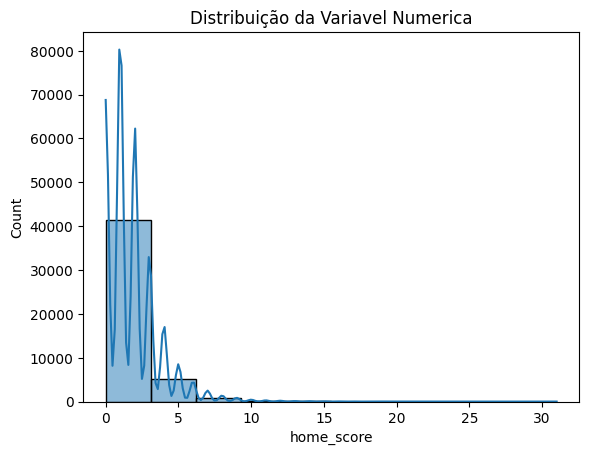

In [ ]:
sns.histplot(df['home_score'], bins=10, kde=True)
plt.title('Distribuição da Variavel Numerica')
plt.show()

Gráficos para variáveis numéricas (Boxplot)

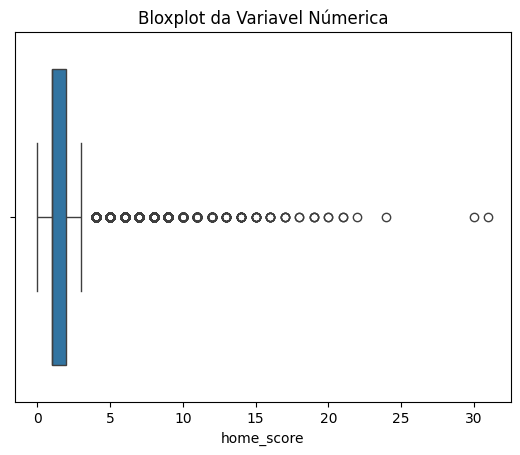

In [ ]:
sns.boxplot(x=df['home_score'])
plt.title('Bloxplot da Variavel Númerica')
plt.show()

Cria um dataframe com os Top10 Torneios

In [7]:
top10 = df['tournament'].value_counts().nlargest(10)
top10_names = top10.index

df_top10 = df[df['tournament'].isin(top10_names)]
df_top10

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47593,2024-09-10,Kuwait,Iraq,0,0,FIFA World Cup qualification,Kuwait City,Kuwait,False
47594,2024-09-10,Palestine,Jordan,1,3,FIFA World Cup qualification,Kuala Lumpur,Malaysia,True
47595,2024-09-10,Bahrain,Japan,0,5,FIFA World Cup qualification,Riffa,Bahrain,False
47596,2024-09-10,Indonesia,Australia,0,0,FIFA World Cup qualification,Jakarta,Indonesia,False


Gráficos para variáveis categóricas (Gráfico de Barras - Visualizar a contagem de categorias)

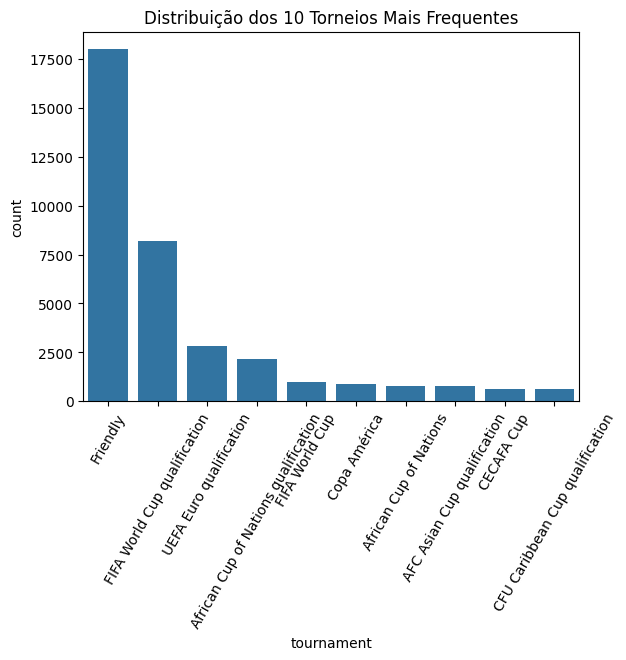

In [ ]:
sns.countplot(x='tournament', data=df_top10, order=top10_names)

plt.title('Distribuição dos 10 Torneios Mais Frequentes')
plt.xticks(rotation=60)
plt.show()

Gráficos para variáveis categóricas (Gráfico de Pizza - Proporções de categorias)

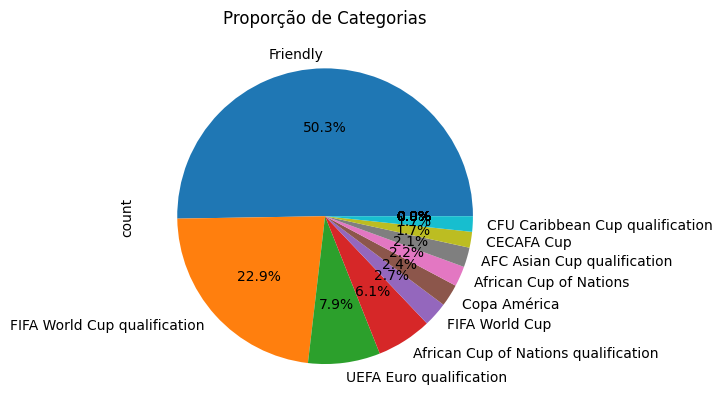

In [ ]:
df_top10['tournament'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporção de Categorias')
plt.show()

Gráficos relacionais ( Gráfico de Dispersão - Verificar correlação entre duas variáveis numéricas )

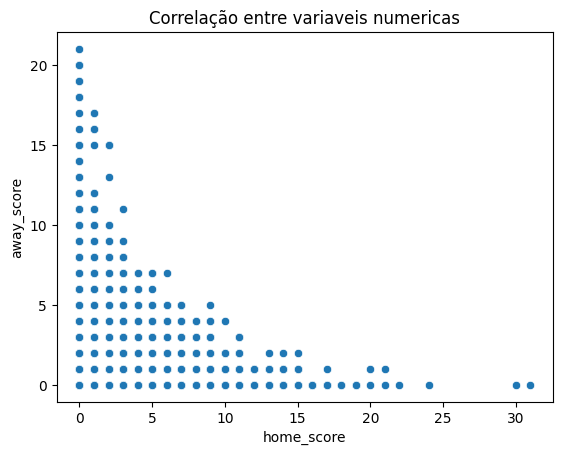

In [ ]:
sns.scatterplot(x='home_score', y='away_score', data=df)
plt.title('Correlação entre variaveis numericas')
plt.show()

**Com base nos gráficos e análises realizadas, responda às seguintes perguntas:**

1. Quais padrões você observou nas variáveis numéricas? (exemplo: distribuição normal, outliers)
2. Como estão distribuídas as variáveis categóricas? Alguma categoria se destaca em termos de frequência?
3. Você identificou correlações entre variáveis numéricas? Qual pode ser a relação entre essas variáveis?
4. Com base nos dados, quais são as principais conclusões que você pode tirar? O que essas conclusões indicam para o contexto do dataset escolhido?

# Padrões observados nas variáveis numéricas:

Variáveis numéricas: home_score, away_score.

**Distribuição dos Gols em Casa**

A maioria dos jogos em casa resultam em baixas pontuações. O valor mais frequente é de 0 a 2 gols, com a maior concentração de partidas tendo até 3 gols.

Existem outliers (jogos com muitos gols), embora esses casos sejam raros. Alguns jogos apresentaram pontuações superiores a 5, mas isso é incomum, conforme demonstrado pela cauda à direita no gráfico.

A distribuição é assimétrica à direita (right-skewed), com a maioria dos jogos em uma faixa de 0 a 3 gols.

**Distribuição dos Gols Fora de Casa**

De forma semelhante, a maioria das equipes jogando fora de casa também marcam poucos gols. A pontuação mais frequente é 0, e a maioria dos jogos resulta em até 2 gols fora de casa.

Há menos jogos fora de casa com pontuações muito altas (maiores que 5) em comparação com os gols em casa. Isso sugere que times visitantes tendem a marcar ainda menos.

A distribuição também é assimétrica à direita, com poucos casos de pontuações altas, e a grande concentração de jogos com poucos gols.
Conclusão:

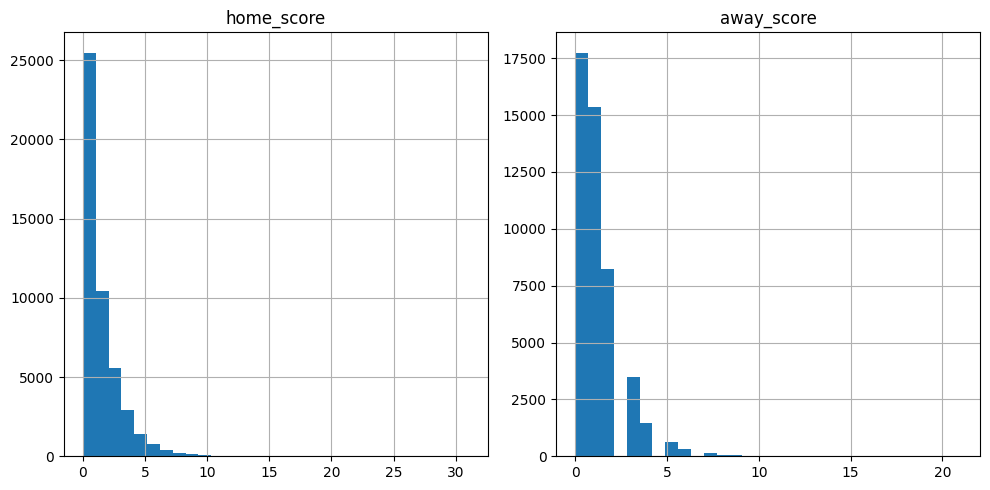

In [ ]:
df[['home_score', 'away_score']].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()

# Distribuição das variáveis categóricas.

As variáveis categóricas, como o nome do torneio (tournament), estão distribuídas de forma desigual, com algumas categorias aparecendo muito mais frequentemente do que outras.

**Como Exemplo temos a variavel "tournament"**
Amistosos (Friendly) são os torneios que mais aparecem, indicando que a maioria dos jogos no dataset são amistosos internacionais. Isso faz sentido, pois as seleções nacionais jogam muitos amistosos ao longo dos anos, entre torneios importantes.

Torneios regionais e continentais, como Copa do Mundo, Copa das Nações Africanas, Eurocopa, e Copa América também aparecem, mas com frequência menor, uma vez que são realizados em ciclos (geralmente a cada 2 ou 4 anos), ao contrário dos amistosos.

Torneios de qualificação para competições maiores, como as eliminatórias para a Copa do Mundo e competições continentais, também estão presentes em uma quantidade significativa.

In [8]:
df['tournament'].value_counts()

,count
tournament,
Friendly,18009
FIFA World Cup qualification,8200
UEFA Euro qualification,2824
African Cup of Nations qualification,2171
FIFA World Cup,964
...,...
ConIFA Challenger Cup,1
FIFA 75th Anniversary Cup,1
Copa Confraternidad,1


# Análise da Correlação

A correlação entre as variáveis home_score e away_score é -0.14, o que indica uma correlação negativa fraca.

Isso sugere que, de maneira geral, quanto maior o número de gols marcados pelo time da casa, ligeiramente menor tende a ser o número de gols marcados pelo time visitante, embora essa relação seja fraca e não tão significativa.

Interpretação:
Como a correlação é fraca e negativa, não parece haver uma relação clara ou forte entre os gols marcados em casa e fora. Ou seja, o fato de um time marcar muitos ou poucos gols em casa não implica em um padrão consistente sobre o número de gols que o time visitante marcará.

Isso pode ser interpretado como um reflexo da natureza imprevisível do futebol, onde o resultado de um jogo é influenciado por vários fatores além do simples desempenho em casa ou fora (como a força do adversário, condições de jogo, entre outros).

Portanto, a relação entre essas variáveis não é significativa o suficiente para fazer uma previsão confiável baseada nos gols marcados por um time, seja jogando em casa ou fora.

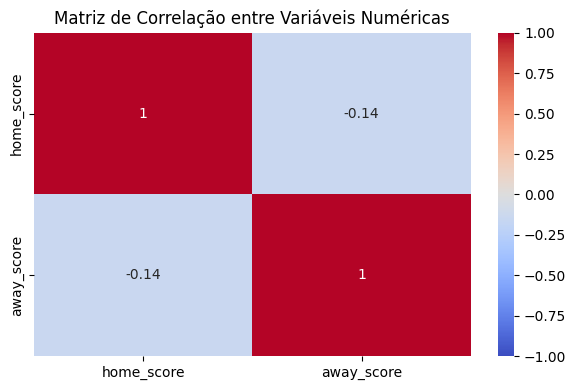

In [9]:
correlation_matrix = df[['home_score', 'away_score']].corr()

# Plotando a matriz de correlação usando heatmap para facilitar a visualização
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

Com base nas análises realizadas das variáveis numéricas, categóricas e das correlações, podemos tirar as seguintes conclusões:

1. Distribuição dos Gols (Variáveis Numéricas):
A maioria dos jogos termina com placares baixos, tanto para o time da casa quanto para o time visitante. A distribuição de gols tende a ser assimétrica, com a maior parte dos jogos resultando em poucos gols (entre 0 e 2 gols). Jogos com placares mais altos são muito menos frequentes, e existem alguns outliers onde times marcaram muitos gols, embora isso seja raro.

Isso reflete a realidade do futebol, onde placares baixos são comuns, e goleadas são exceções. Portanto, é razoável concluir que empates ou vitórias com placares modestos (1-0, 2-1) são mais frequentes.

2. Distribuição das Variáveis Categóricas:
Analisando as variáveis como países (seleções) envolvidas nos jogos, observou-se que certos países têm maior frequência de partidas. Isso é esperado, já que seleções com tradição em futebol, como Inglaterra, Brasil, Argentina, etc., participam de mais competições ao longo dos anos.

Essa distribuição revela a dominância histórica de algumas seleções em competições internacionais, além de indicar que países mais envolvidos com o futebol jogam muito mais jogos, influenciando a quantidade de dados coletados.

3. Correlação entre Gols Marcados (Home vs. Away):
A correlação entre o número de gols marcados em casa (home_score) e fora (away_score) é fraca e negativa (-0.14). Isso sugere que, em geral, não há uma relação direta entre a quantidade de gols que um time marca jogando em casa e os que o time visitante marca.

Essa fraca correlação reforça a ideia de que o resultado de uma partida é muito influenciado por variáveis além do simples fato de jogar em casa ou fora, como a qualidade das equipes, a pressão do público, e fatores aleatórios.

Conclusão Geral:
O conjunto de dados de resultados de futebol internacional revela que o futebol é um esporte amplamente imprevisível, com forte tendência a placares baixos e pouca correlação entre o desempenho em casa e fora. As seleções mais tradicionais jogam mais frequentemente, o que pode indicar seu impacto global no cenário futebolístico. Essas conclusões ajudam a entender o comportamento geral das partidas internacionais e como os resultados são distribuídos em termos de gols e frequência de jogos, reforçando a natureza competitiva e imprevisível do futebol.